# Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Importing data

In [ ]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data.shape

(17000, 9)

# Univariate Linear Regression

To make a Univariate Linear Regression, we need only one feature and a independent variable.
Only looking throught the columns, I'll select the feature I believe that is the best to predict
the "median_house_value", which is "median_income", that represents the median income of
the population of a determined neighbor in California.

In [ ]:
# spliting X (dependent variable) and Y (independent variable)
data = data.sample(100, random_state=42)
X = data["median_income"]
y = data["median_house_value"]

What we want is to find the line that better fits these datapoints.

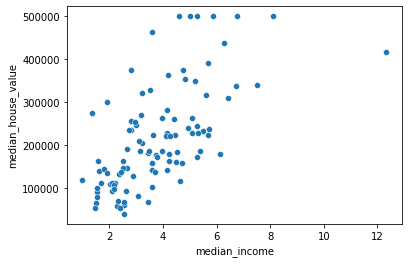

In [ ]:
# visualizing the relationship between these two variables
sns.scatterplot(X, y)

# Feature Scaling

Because we have two variables in different scales, it can turns the gradient descent algorithm slowly.
So, in order to gradient descent find a path to the minimum cost more directly and faster, we need to
scale the features. In this case, I'll use min-max scaler, which has the following formula:

<img src="https://i.stack.imgur.com/EuitP.png">


### Scaling for X

In [ ]:
X.head(3)

10941    3.5959
5250     8.1124
10292    2.5288
Name: median_income, dtype: float64

In [ ]:
# getting max and min of the column X
x_min = min(X)
x_max = max(X)

In [ ]:
X = X.apply(lambda x: (x - x_min)/(x_max - x_min))
X.head(3)

10941    0.230695
5250     0.628548
10292    0.136696
Name: median_income, dtype: float64

### Scaling for Y

In [ ]:
y.head(3)

10941    142700.0
5250     500001.0
10292     61800.0
Name: median_house_value, dtype: float64

In [ ]:
# getting max and min of the column y
y_min = min(y)
y_max = max(y)

In [ ]:
y = y.apply(lambda y: (y - y_min)/(y_max - y_min))
y.head(3)

10941    0.223260
5250     1.000000
10292    0.047391
Name: median_house_value, dtype: float64

### Visualizing the scatterplot again

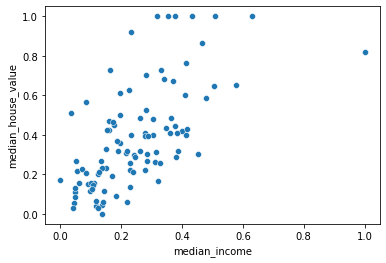

In [ ]:
sns.scatterplot(X, y)
plt.show()

# Cost function

The cost function tell us how the model is going. It's criterion, a numeric way to check if the line
we choose is the best line. The most common cost function is the Squared Error Sum.

A univariate linear regression model, has the following equation:
f(x) = w1*x + b, in which w1 and b are the parameters, and X is the
value of our feature.

For this first example, I'll consider the parameter b equal 0, so the equation get's the following shape:
f(x) = w1*x.

In [ ]:
# hypothesis function
def h(x, w1):
  return w1*x

In [ ]:
# cost function
def cost_function(x, y, w1):
  x, y = np.array(x), np.array(y)
  sum = 0
  m = len(x) # number of data points
  for i in range(m):
    prediction = h(x[i], w1)
    real = y[i]
    sum += (prediction-real)**2
  
  return sum/(2*m)

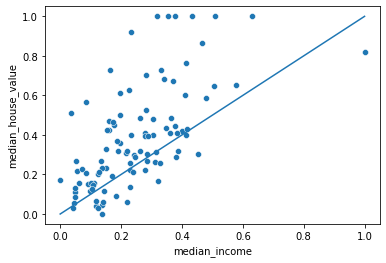

In [ ]:
# considering w1 = 1
sns.scatterplot(X, y)
sns.lineplot(X, X)
plt.show()

Considering w1 = 1, which is the blue line above, we would have the below Squared Error cost function value.

In [ ]:
cost_function(X, y, 1)

0.028819420314163693

# Gradient Descent

Now is time to find the best value of w1 for our line. It's done by finding the parameters that minimize our cost function. It's done with the Gradient Descent algorithm, that has the following formula:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20200611183120/1406-7.png" />

It's updating the parameter J subtracting it by the learning rate times the partial derivative of the cost function in respect of the parameter J.

Visually, we can see this in the following way:

<img src="https://static.wixstatic.com/media/a27d24_14a76eafede74b5a9e028b54d64c08d1~mv2.png/v1/fill/w_1000,h_542,al_c,usm_0.66_1.00_0.01/a27d24_14a76eafede74b5a9e028b54d64c08d1~mv2.png" />

In [ ]:
def derivative_cost_function(x, y, w1):
  x = np.array(x)
  y = np.array(y)
  m = len(x)
  sum = 0
  for i in range(m):
    prediction = h(x[i], w1)
    real = y[i]
    sum += ((prediction-real) * x[i])

  return sum/m

In [ ]:
def gradient_descent(x, y, w1, learning_rate=0.1, n_iterations=10):
  j_all = {}
  for _ in range(n_iterations):
    j_all[w1] = derivative_cost_function(x, y, w1)
    w1 = w1 - (learning_rate * derivative_cost_function(x, y, w1))

  return list(j_all.keys())[-1], j_all

In [ ]:
w1, w1_cost = gradient_descent(X, y, 0, 0.1, 1000)

In [ ]:
predictions = []
X = np.array(X)
for i in X:
  predictions.append(h(i, w1))

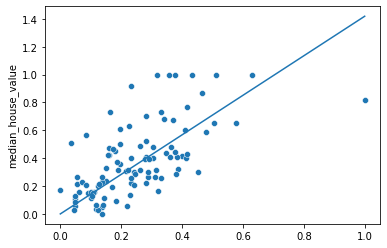

In [ ]:
sns.scatterplot(X, y)
sns.lineplot(np.array(X), predictions)

# Validating

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X.reshape(-1,1), y)
model.coef_

array([1.41895476])

In [ ]:
w1

1.4186379586306954